In [2]:
import pandas as pd
from matplotlib import pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

In [3]:
data = pd.read_csv('../data/raw_analyst_ratings.csv')

count    1.407328e+06
mean     7.312051e+01
std      4.073531e+01
min      3.000000e+00
25%      4.700000e+01
50%      6.400000e+01
75%      8.700000e+01
max      5.120000e+02
Name: headline_length, dtype: float64
publisher
Paul Quintaro        228373
Lisa Levin           186979
Benzinga Newsdesk    150484
Charles Gross         96732
Monica Gerson         82380
                      ...  
Matthew Ely               1
Frank Ochoa               1
Jeremie Capron            1
Marvin Dumont             1
Igor Gonta                1
Name: count, Length: 1034, dtype: int64
0
date
2009-02-14      1
2009-04-27      2
2009-04-29      1
2009-05-22      1
2009-05-27      6
             ... 
2020-06-07     25
2020-06-08    765
2020-06-09    803
2020-06-10    807
2020-06-11    544
Length: 3955, dtype: int64


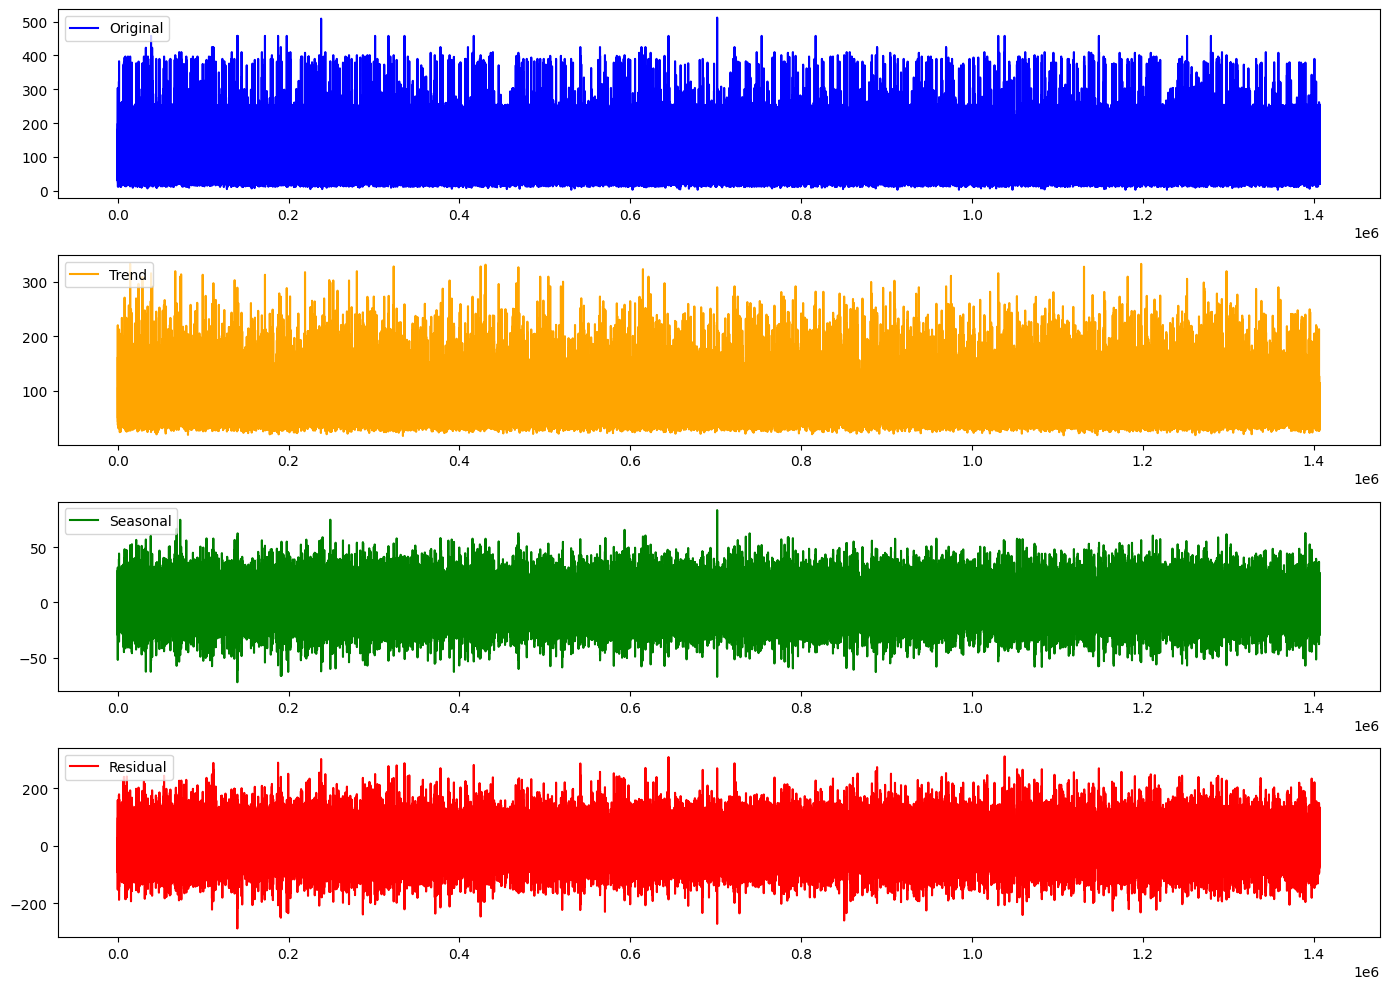

In [4]:
# DECRPTIVE STATISTICS

# count the length of each headline
data['headline_length'] = data['headline'].apply(len)
print(data['headline_length'].describe())

# count the length of each summary
publisher_count = data['publisher'].value_counts()
print(publisher_count)


# MISSING DATA
null_date = data['date'].isnull().sum()
print(null_date)

# Convert publication date to datetime
data['date'] = pd.to_datetime(data['date'],format='ISO8601',errors='coerce',utc=True)

# Group by date and count the number of articles
publication_trends = data.groupby(data['date'].dt.date).size()

print(publication_trends)


# Trend extraction
data['Trend'] = data['headline_length'].rolling(window=4, center=True).mean()

# Detrend to get seasonal + residual
detrended = data['headline_length'] - data['Trend']

# (Optional) Extract seasonality using a simple moving average of detrended data
data['Seasonal'] = detrended.rolling(window=4, center=True).mean()

# Residuals
data['Residual'] = detrended - data['Seasonal']

# Plotting the manually extracted components
plt.figure(figsize=(14, 10))

plt.subplot(411)
plt.plot(data['headline_length'], label='Original', color='blue')
plt.legend(loc='upper left')

plt.subplot(412)
plt.plot(data['Trend'], label='Trend', color='orange')
plt.legend(loc='upper left')

plt.subplot(413)
plt.plot(data['Seasonal'], label='Seasonal', color='green')
plt.legend(loc='upper left')

plt.subplot(414)
plt.plot(data['Residual'], label='Residual', color='red')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()



